In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import api_keys
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [5]:
# The OpenWeatherMap API Key Location
api_key = api_keys.api_key

# Call the weather map API through this URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [6]:
# Use Openweather api to get the weather data needed from those cities.


# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
max_temp = []
wind_speed = []
humidity = []
country = []
date = []

lat = []
lng = []

# Initiate the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


# Build a for loop the queries through each city
for city in cities:  
    
    # The 'Try' statement is used to append calls where value is found 
    # Not all of the calls return as OpenWeatherMap
    # It will not have have all records in the cities generated by the CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json()
        
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        print(f"Processing Record {record} | {city_record}")
        
        # Incrament counter by one 
        record = record + 1 
        
        # Create a second hold to not avoid curruption of the APi
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
print("----------------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Cape Town
Processing Record 2 | Tura
City not found. Skipping...
Processing Record 3 | Provideniya
Processing Record 4 | Butaritari
Processing Record 5 | Coos Bay
Processing Record 6 | Rikitea
Processing Record 7 | Mataura
Processing Record 8 | Razdolinsk
Processing Record 9 | Hermanus
Processing Record 10 | Ribeira Grande
Processing Record 11 | Vaini
City not found. Skipping...
Processing Record 12 | Lata
Processing Record 13 | Avarua
Processing Record 14 | Bluff
Processing Record 15 | Ilulissat
Processing Record 16 | Thompson
City not found. Skipping...
Processing Record 17 | Saskylakh
Processing Record 18 | Khatanga
Processing Record 19 | Pedernales
City not found. Skipping...
Processing Record 20 | Castro
Processing Record 21 | Mbandaka
Processing Record 22 | Yellowknife
Processing Record 23 | Concordia
City not found. Skipping...
Processing Record 24 | Ushuaia
Processing Record 25 | Tuktoyaktuk
Processi

Processing Record 226 | Nanzhang
Processing Record 227 | Dieppe
Processing Record 228 | Warmbad
Processing Record 229 | Hervey Bay
Processing Record 230 | Sukabumi
Processing Record 231 | Sao Sebastiao
City not found. Skipping...
Processing Record 232 | Havre-Saint-Pierre
Processing Record 233 | Gimbi
Processing Record 234 | Pangnirtung
Processing Record 235 | Sinnar
Processing Record 236 | Poddorye
Processing Record 237 | Tessalit
Processing Record 238 | Byron Bay
Processing Record 239 | Ketchikan
Processing Record 240 | Sunrise Manor
Processing Record 241 | Moulins
Processing Record 242 | Cayenne
Processing Record 243 | Coihaique
Processing Record 244 | Broken Hill
Processing Record 245 | Baisha
Processing Record 246 | Viedma
Processing Record 247 | Helena
Processing Record 248 | Hualmay
Processing Record 249 | Tromso
Processing Record 250 | Zabol
Processing Record 251 | Narsaq
Processing Record 252 | Port Hardy
Processing Record 253 | Rio Grande
Processing Record 254 | Santa Maria
P

Processing Record 457 | Marsh Harbour
Processing Record 458 | Axim
City not found. Skipping...
Processing Record 459 | Khomutovo
Processing Record 460 | Impfondo
Processing Record 461 | Ostrovnoy
Processing Record 462 | Juli
Processing Record 463 | Tafresh
City not found. Skipping...
Processing Record 464 | Nouakchott
Processing Record 465 | Rafaela
Processing Record 466 | Tilichiki
Processing Record 467 | Inuvik
Processing Record 468 | Port Moresby
Processing Record 469 | Kollam
Processing Record 470 | Minab
Processing Record 471 | Verkhoyansk
Processing Record 472 | Sungaipenuh
City not found. Skipping...
Processing Record 473 | Praia
Processing Record 474 | Pichayevo
Processing Record 475 | Port Pirie
Processing Record 476 | Port-Cartier
City not found. Skipping...
Processing Record 477 | Casma
Processing Record 478 | Regente Feijo
Processing Record 479 | Mandan
Processing Record 480 | Khash
Processing Record 481 | Iskateley
Processing Record 482 | Turayf
Processing Record 483 | Gal

In [7]:
weather_dictionary = pd.DataFrame({"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng 
             })
# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_dictionary)
weather_data.head(10)

,City,Cloudiness,Country,Max Temp,Wind Speed,Date,Humidity,Lat,Lng
0,Cape Town,20,ZA,60.01,8.05,1573162947,87,-33.93,18.42
1,Tura,99,RU,1.22,3.76,1573162949,97,64.27,100.22
2,Provideniya,58,RU,30.20,20.13,1573162950,74,64.42,-173.23
3,Butaritari,2,KI,83.55,10.94,1573162951,75,3.07,172.79
4,Coos Bay,1,US,60.01,10.29,1573162952,71,43.37,-124.22
5,Rikitea,8,PF,75.83,4.74,1573162954,80,-23.12,-134.97
6,Mataura,0,NZ,62.01,11.99,1573162955,55,-46.19,168.86
7,Razdolinsk,100,RU,28.47,11.83,1573162956,96,58.42,94.62
8,Hermanus,9,ZA,55.99,5.57,1573162957,93,-34.42,19.24
9,Ribeira Grande,20,PT,60.80,6.93,1573162959,77,38.52,-28.70


In [15]:
weather_data.to_html('Table.html')

In [8]:
weather_df = pd.DataFrame

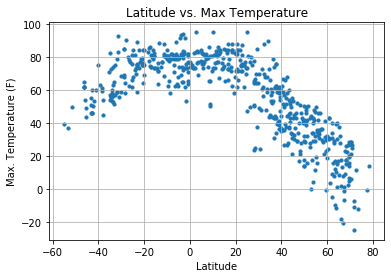

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"],s=10,marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")

plt.grid(True)
plt.show()

#plt.savefig('Temp_vs_Lat.png')

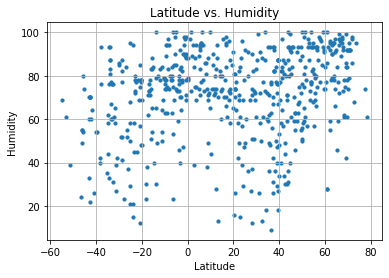

In [10]:
# Latitude vs Humidity Scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"],s=10,marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(True)
plt.show()

#plt.savefig('Humidity_vs_Lat.png')

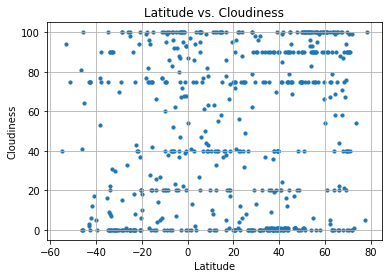

In [11]:
# Latitude vs. cloudiness scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],s=10,marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(True)
plt.show()

#plt.savefig('Cloud_vs_Lat.png')

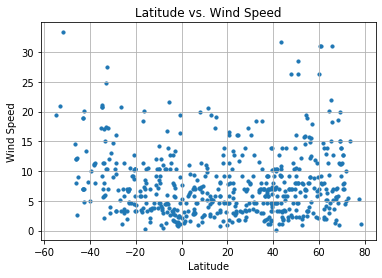

In [12]:
#  Latitude vs. wind scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"],s=10,marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(True)
plt.show()

#plt.savefig('Wind_vs_Lat.png')